# Calibrating Bank Churners: Data Analysis

## I. Introduction
Customer churn refers to the phenomenon where customers stop doing business with a company. In the context of this dataset, churn indicates customers who have closed their accounts with the bank, thus ending their relationship with the organization. 

### Why Analyze Churn?
- Retaining customers is more cost-effective than acquiring new ones.
- Insights from churn analysis can help businesses reduce revenue loss.
- Predictive models can enable proactive retention strategies, improving customer satisfaction and loyalty and thus lowering the probability of churning. 

### In this project, we will consider and possibly provide answers to questions such as:
1. **Who is at risk of churning?**
2. **What kind of factors influence churn?**
3. **How do churn patterns vary across different demographics?**
4. **What kind of steps can the bank follow to avoid reduce churn?**

Some advanced statistical and machine learning techniques will be used to analyze the data; rest assured their relevance and propriety to this data will be documented at length in addition to explaining any applicable formulae.

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('ggplot')

In [62]:
df = pd.read_csv(r'C:\Users\Connor\Documents\Projects\Credit_Card_Analysis\Credit_Card_Cleaned_Data.csv')

## II. Descriptive Analysis

In [63]:
# Quick peek at the data
df.head(3)

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,719859033,Attrited Customer,32,Male,3,Graduate,Married,$40k - $60k,Blue,20,...,2,2,3264.0,0.0,3264.0,0.55,6439.0,63.0,0.75,0.00
1,708399858,Existing Customer,45,Female,3,High School,Married,Less Than $40k,Blue,35,...,2,1,2548.0,2250.0,298.0,0.58,4747.0,77.0,0.79,0.88
2,708229308,Attrited Customer,49,Female,2,Unknown,Married,Less Than $40k,Blue,41,...,2,2,3243.0,0.0,3243.0,0.69,6059.0,71.0,0.82,0.00


In [64]:
# Some descriptive data (quantitative columns only)
df.describe()

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.760453,4404.086304,64.858695,0.712678,0.275281
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219254,3397.129254,23.472570,0.238079,0.275868
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.630000,2155.500000,45.000000,0.580000,0.020000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.740000,3899.000000,67.000000,0.700000,0.180000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.860000,4741.000000,81.000000,0.820000,0.500000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.400000,18484.000000,139.000000,3.710000,1.000000


The descriptive data reveals to us some really neat details. **df.describe()** is usually a very efficient way to find early outliers in the data, and we can already notice some such as the client with a credit limit of 34,516 compared to the 75th percentile of 11,068. Also, The mean of the credit limit column is nearly double the median, suggesting that there may be a small group of clients with large credit limits skewing these statistics.  

In [65]:
# Number of rows (total # of bank clients) and columns
print(df.shape)
# columns
print(df.columns)

(10127, 21)
Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


We see that there 10,127 unique bank clients with 21 different attributes assigned to them. 

In [66]:
# Column type and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

We see which columns fit into each data type category. We also can see the # of nulls in each column, but since we already addressed that problem in pgAdmin 4 (SQL), we do not need to concern ourselves with nulls in this analysis. 

Before moving on to the analysis, we should visualize the initial descriptive data just to get a better idea of what the data looks like.

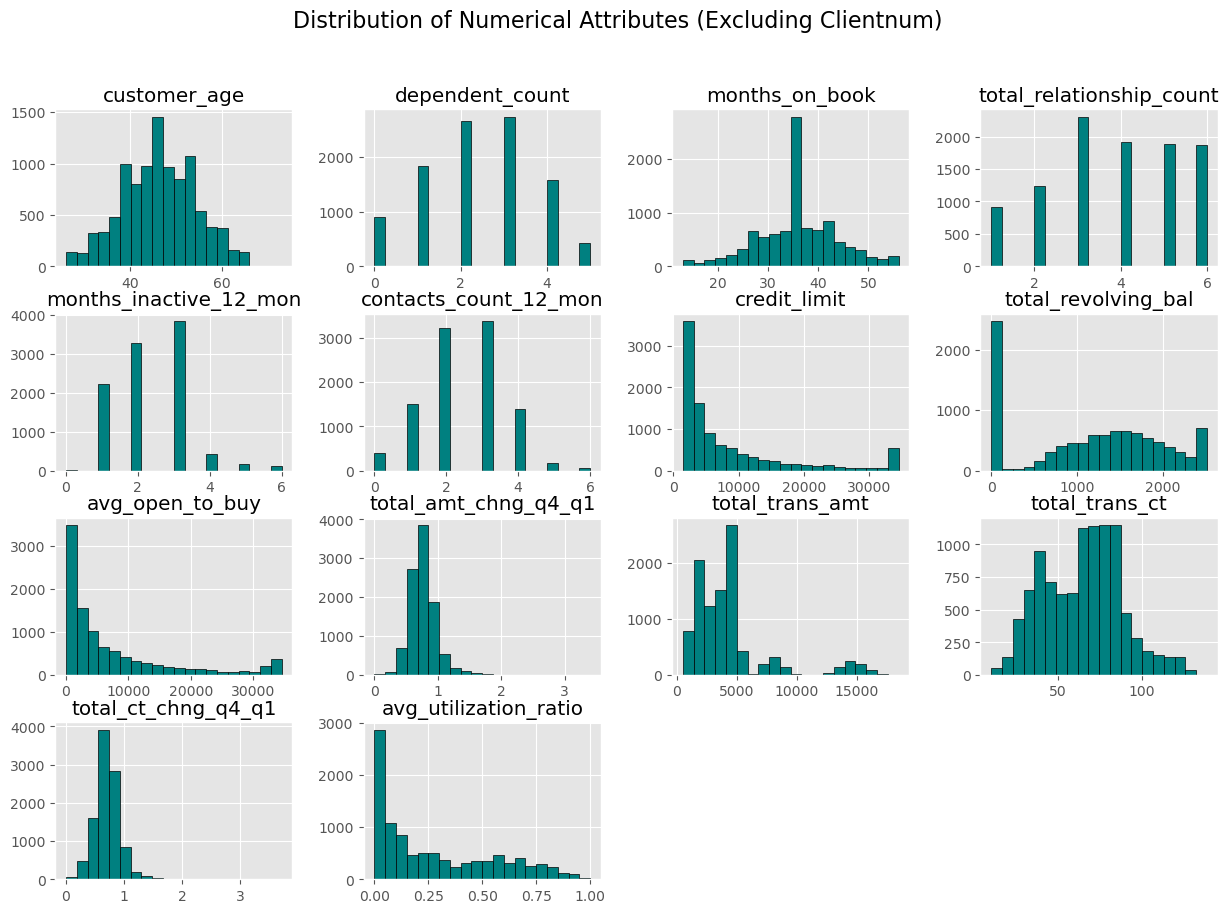

In [67]:
# Histograms for all numerical columns
df.drop(columns=['clientnum']).hist(bins=20, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Attributes (Excluding Clientnum)', fontsize=16)
plt.show()

Some of these distributions appear normal while some might be worth considering a further dive into. For example, there appears to be an absurdly large amount of clients at the 35th month of their relationship with the bank relative to other months. The existence of this anomaly may point at some sort of time frame where clients choose to continue or terminate their relationship with the bank. The monetary categories (e.g., **credit limit**) are right-skewed, suggesting some degree of loyalty that high-spenders share with the bank. 

Fortunately, we already cleaned the data with SQL earlier, so we can afford to skip that step for now. We already looked at some of the data without manipulating it to see if anything sticks out to us. Now, we can afford to manipulate and transform the data where appropriate to extract some descriptive insights as as well as build some predictive models to help out the bank with its churning problem. 

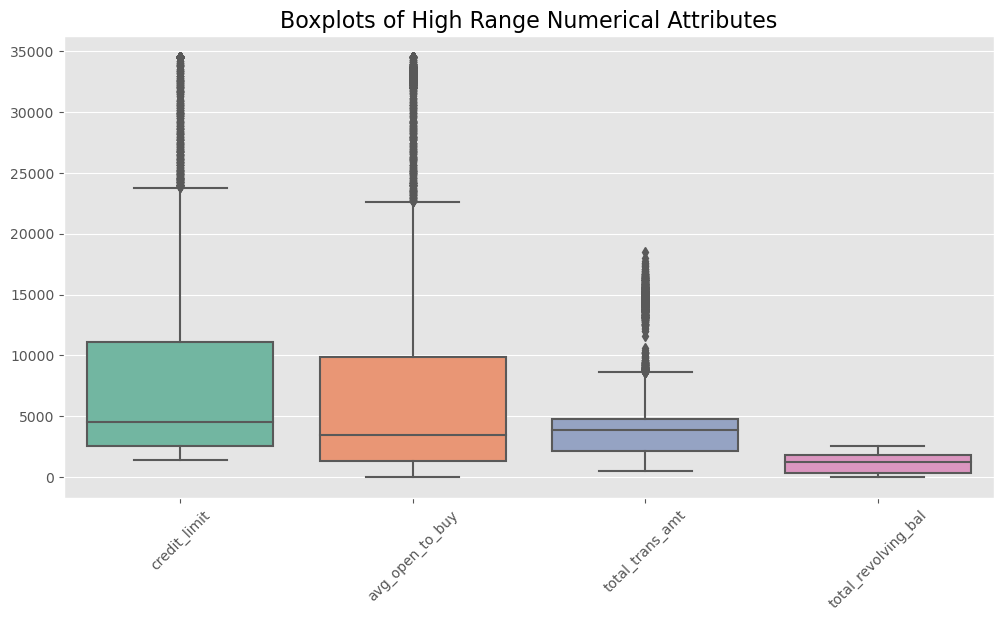

In [68]:
# Specific numerical columns for boxplots (only the columns with large ranges)
selected_cols = ['credit_limit', 'avg_open_to_buy', 'total_trans_amt', 'total_revolving_bal']

# Boxplots for the selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_cols], palette='Set2')
plt.title('Boxplots of High Range Numerical Attributes', fontsize=16)
plt.xticks(rotation=45)
plt.show()

This plot reveals that there actually quite a few outliers in the dataset. Of course, this makes sense when the bank's clientele likely ranges from poor to wealthy. As such, it's not a great idea to consider removing these clients from the dataset as it could restrict our predictive abilities later as well as hinder some crucial insights. 

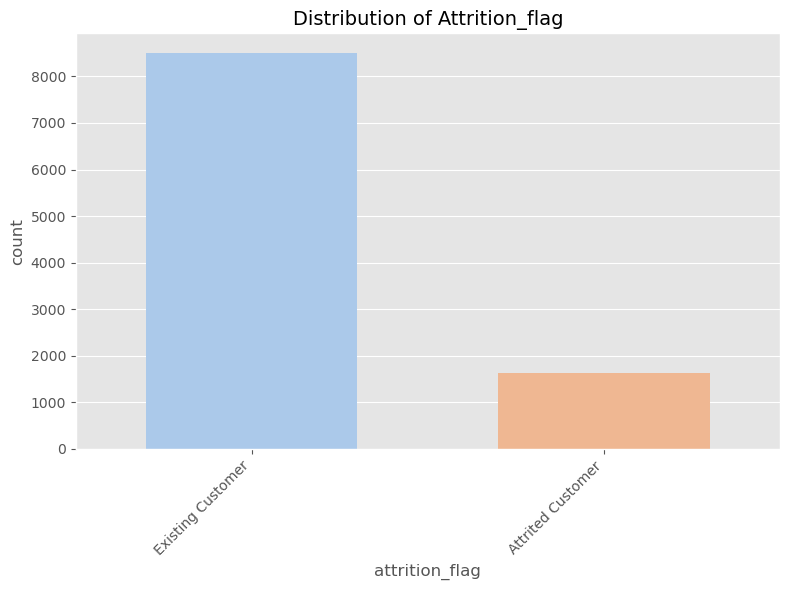

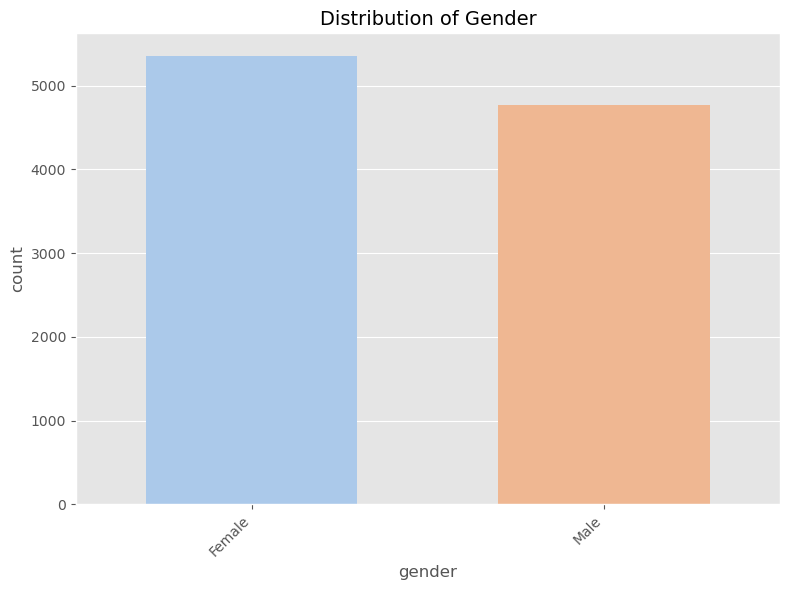

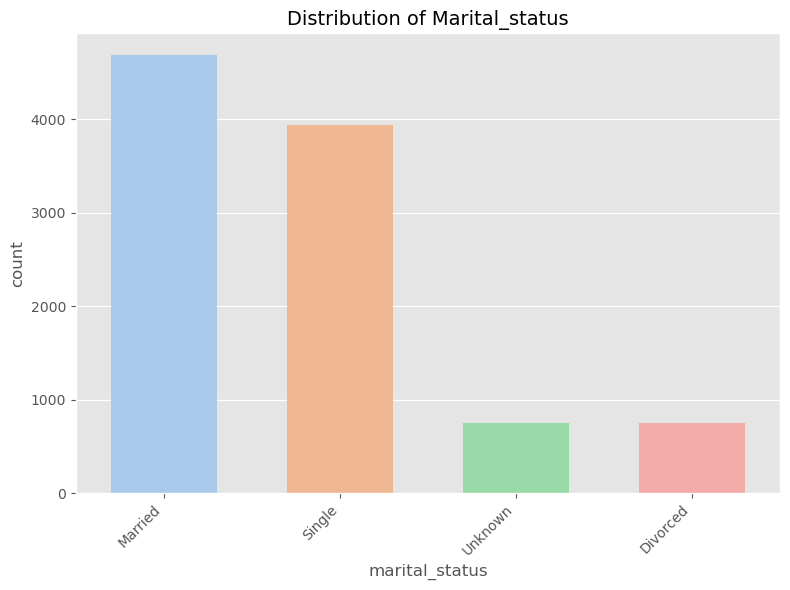

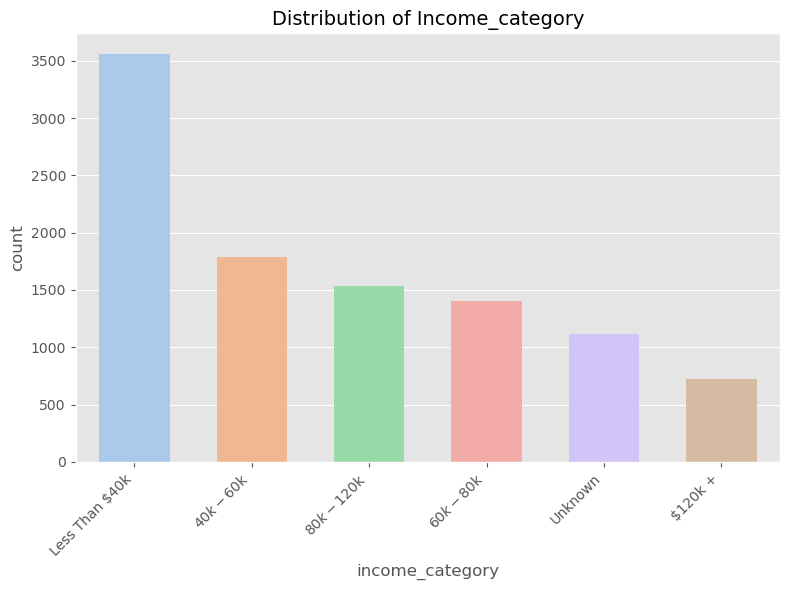

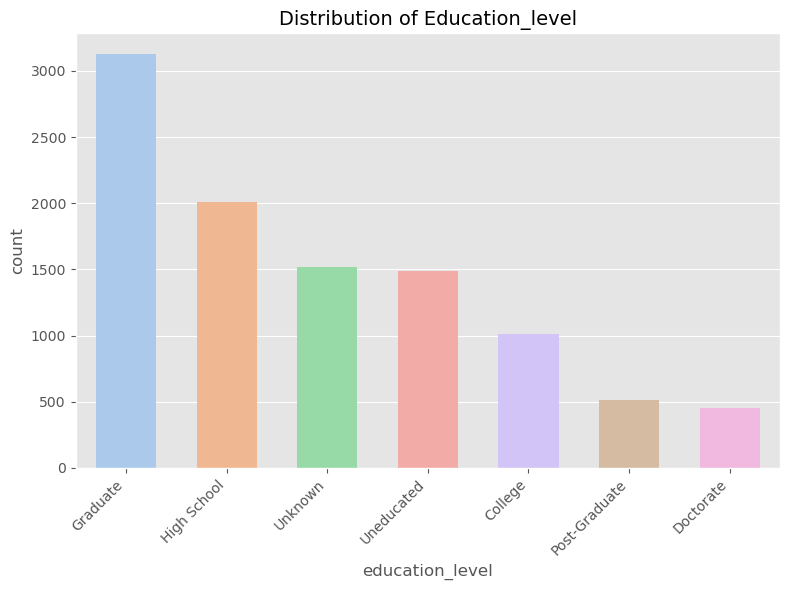

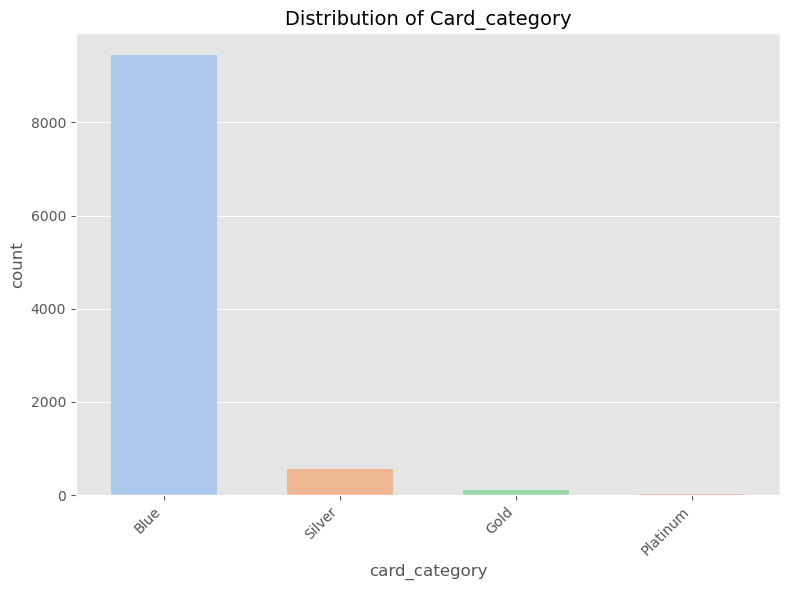

In [69]:
# Count plots for each categorical column
categorical_cols = ['attrition_flag', 'gender', 'marital_status', 'income_category', 'education_level', 'card_category']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index, width=0.6)
    
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  
    plt.show()

Most of the bank's clients appear to be lower-income (less than $40k). Comparing churn across income levels might reveal some discrepancies and insights to take action on later. The vast majority also appear to be users of the Blue card category. 

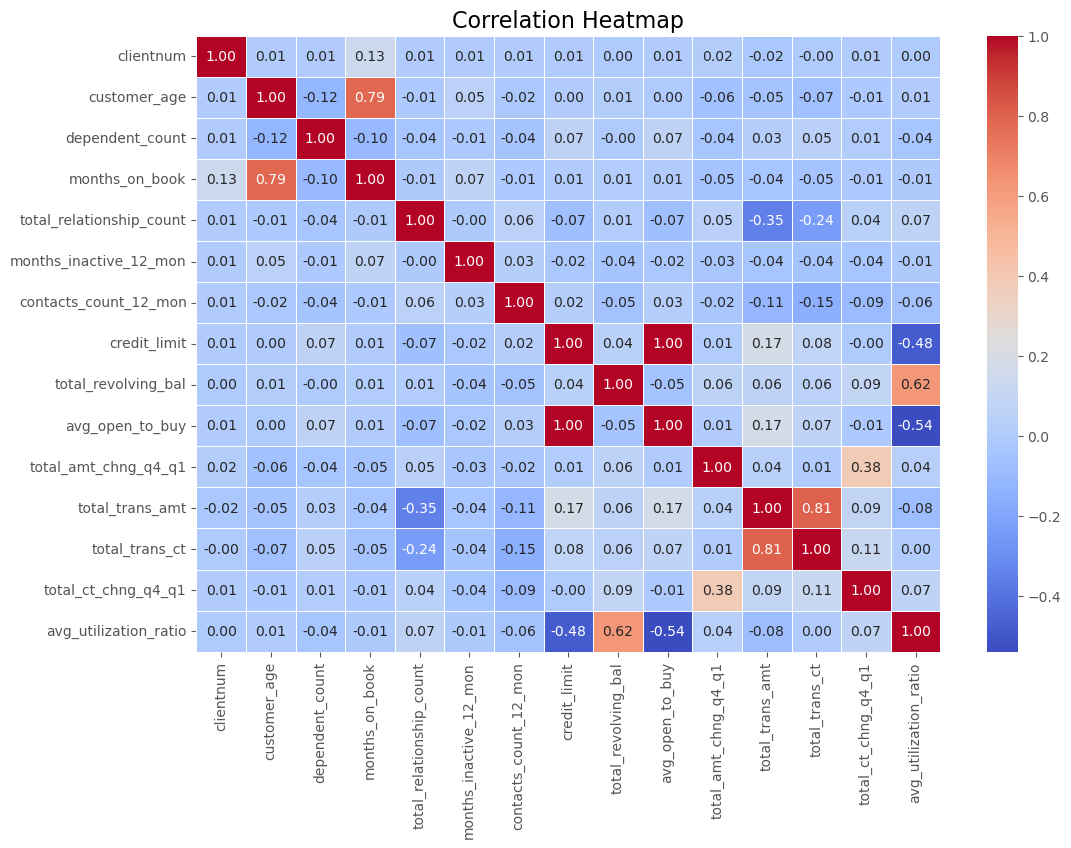

In [70]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Some interesting results to note here, but nothing too out of the ordinary. Strong positive assocation between customer age and total length of relationship with the bank, as expected. Negative associations between # of products held by customer and total transaction amount. A little difficult to fully explore without distinguishing the clients between who did and did not churn. The more interesting correlations exist between the variables and whether a client is a churner, which we will explore soon.  

Lastly, before proceeding with the analysis, we should check the percentage of overall churners (our most important column).

In [71]:
# Count of each value in the 'attrition_flag' column
churn_counts = df['attrition_flag'].value_counts()

# Percentage of churners
churn_percentage = (churn_counts['Attrited Customer'] / churn_counts.sum()) * 100


print(f"Total Count of Customers: {churn_counts.sum()}")
print(f"Churners (Attrited Customer): {churn_counts['Attrited Customer']}")
print(f"Percentage of Churners: {churn_percentage:.2f}%")

Total Count of Customers: 10127
Churners (Attrited Customer): 1627
Percentage of Churners: 16.07%


Our first step in the analysis is picking up right where we left off—taking a look at the correlations. However, we are now going to encode attrition status so that we can properly assess which of the columns is associated or non-associated with the attrition status of the client. 

In [72]:
# unique values for the categorical columns
print("Unique values in card_category:")
print(df['card_category'].unique())

print("\nUnique values in education_level:")
print(df['education_level'].unique())

print("\nUnique values in marital_status:")
print(df['marital_status'].unique())

print("\nUnique values in attrition_flag:")
print(df['attrition_flag'].unique())

print("\nUnique values in gender:")
print(df['gender'].unique())

print("\nUnique values in income_category:")
print(df['income_category'].unique())

Unique values in card_category:
['Blue' 'Silver' 'Gold' 'Platinum']

Unique values in education_level:
['Graduate' 'High School' 'Unknown' 'College' 'Doctorate' 'Post-Graduate'
 'Uneducated']

Unique values in marital_status:
['Married' 'Single' 'Unknown' 'Divorced']

Unique values in attrition_flag:
['Attrited Customer' 'Existing Customer']

Unique values in gender:
['Male' 'Female']

Unique values in income_category:
['$40k - $60k' 'Less Than $40k' '$120k +' '$80k - $120k' 'Unknown'
 '$60k - $80k']


In [73]:
# Mapping categorical columns to numeric values
df['gender_numeric'] = df['gender'].apply(lambda x: 1 if x.strip().lower() == 'female' else 0)

# Income category mapping
income_mapping = {
    '$40k - $60k': 1,
    'less than $40k': 0,
    '$120k +': 4,
    '$80k - $120k': 3,
    'unknown': -1,
    '$60k - $80k': 2
}
df['income_category_numeric'] = df['income_category'].apply(lambda x: income_mapping[x.strip().lower()])

# Mapping for card_category
card_category_mapping = {
    'blue': 0,
    'silver': 1,
    'gold': 2,
    'platinum': 3
}
df['card_category_numeric'] = df['card_category'].apply(lambda x: card_category_mapping[x.strip().lower()])

# Education level mapping
education_mapping = {
    'high school': 0,
    'graduate': 1,
    'unknown': -1,
    'college': 2,
    'doctorate': 3,
    'post-graduate': 4,
    'uneducated': -2
}
df['education_level_numeric'] = df['education_level'].apply(lambda x: education_mapping[x.strip().lower()])

# Marital status mapping
marital_status_mapping = {
    'single': 0,
    'married': 1,
    'unknown': -1,
    'divorced': 2
}
df['marital_status_numeric'] = df['marital_status'].apply(lambda x: marital_status_mapping[x.strip().lower()])

df['churn_target'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# compute correlation with the cleaned df
correlation_with_churn = df_cleaned.corr()['churn_target'].sort_values(ascending=False)

# Display the updated correlations
print(correlation_with_churn)

churn_target                1.000000
contacts_count_12_mon       0.204491
months_inactive_12_mon      0.152449
gender_numeric              0.037272
dependent_count             0.018991
customer_age                0.018203
months_on_book              0.013687
education_level_numeric     0.010685
card_category_numeric       0.002354
avg_open_to_buy            -0.000285
income_category_numeric    -0.013577
marital_status_numeric     -0.018597
credit_limit               -0.023873
clientnum                  -0.046430
total_amt_chng_q4_q1       -0.131270
total_relationship_count   -0.150005
total_trans_amt            -0.168598
avg_utilization_ratio      -0.178605
total_revolving_bal        -0.263053
total_ct_chng_q4_q1        -0.290286
total_trans_ct             -0.371403
Name: churn_target, dtype: float64


We immediately see that total_trans_ct has a negative correlation with churn, implying that the clients with more transactions are less likely to churn than clients with less transactions. 

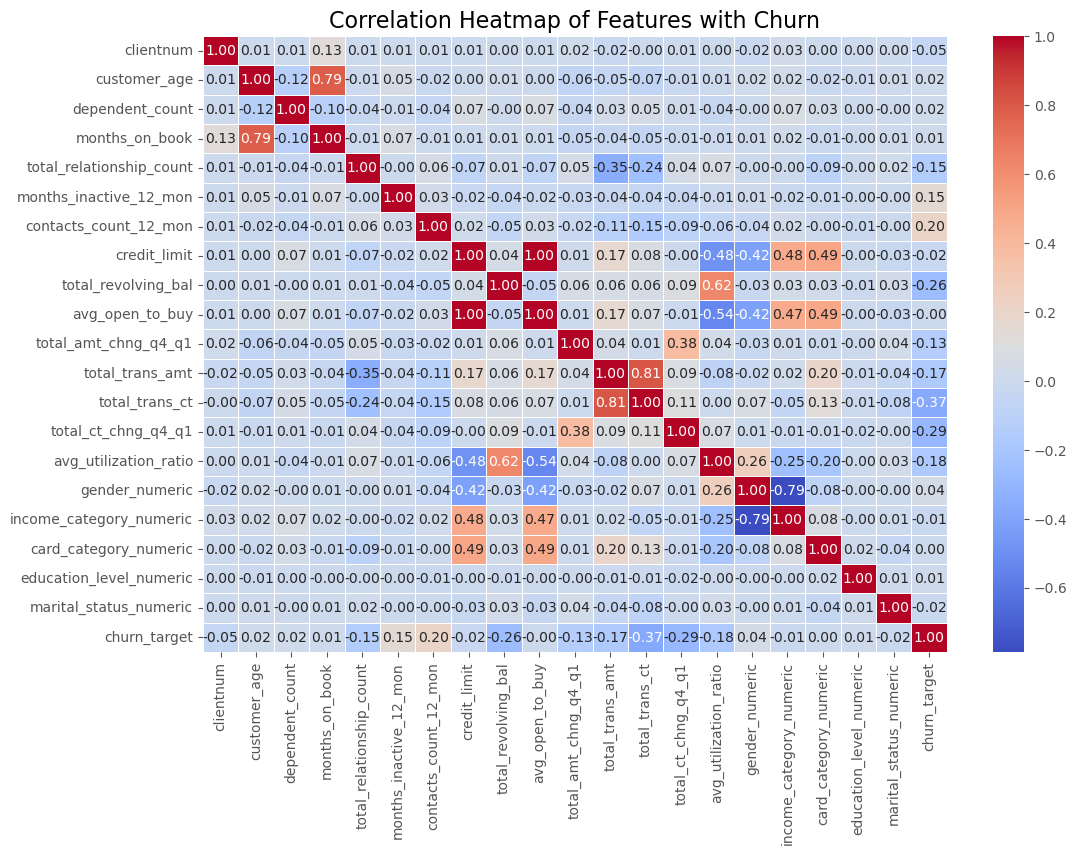

In [74]:

correlation_matrix = df_cleaned.corr()

# heatmap
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Churn', fontsize=16)
plt.show()

The row we want to pay special attention to is churn_target at the bottom. Some columns such as gender have little association with the likelihood of a client churning, whereas columns such as contacts_count have a stronger association with the likelihood of a client churning. Though, it's difficult to definitively say that these variables are associated with a client churning or even significant. Thus, we turn to logistic regression and predictive analysis later. 

In [75]:
# Verifying the distribution of churn_target
print(df['churn_target'].value_counts())

0    8500
1    1627
Name: churn_target, dtype: int64


<Figure size 1000x600 with 0 Axes>

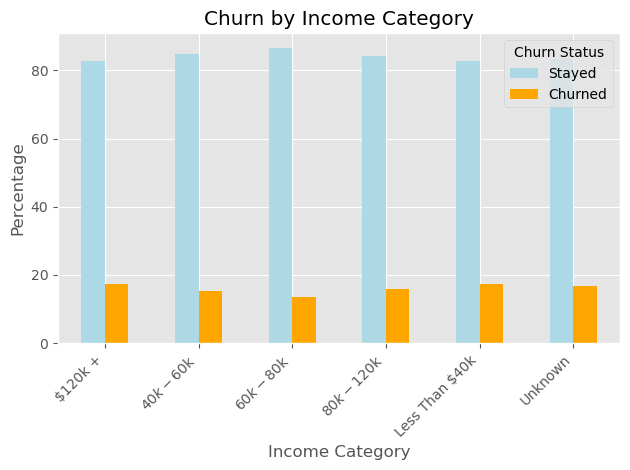

In [76]:
# percentage of churners for each income category
income_churn_percentage = df.groupby('income_category')['churn_target'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10, 6))
income_churn_percentage.plot(kind='bar', stacked=False, color=['lightblue', 'orange'])

plt.title('Churn by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Churn Status', labels=['Stayed', 'Churned'])
plt.tight_layout() 
plt.show()

We know that lower income levels comprise most of the bank's clients, but we can now visualize if there is a discernible in attrition differences among the income levels. At this point it's difficult to make that assessment with confidence, but those in the middle income levels are exhibiting less signs of attrition than their higher and lower income peers. 

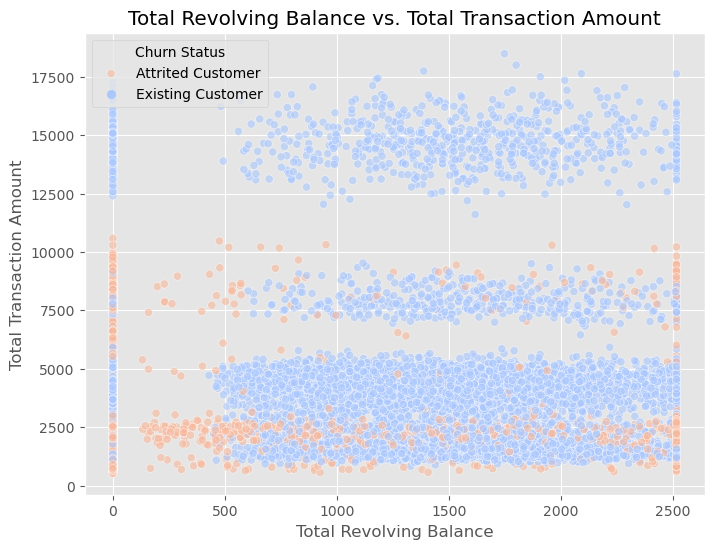

In [77]:
# Revolving Balance vs. Total Transactions Amt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_revolving_bal', y='total_trans_amt', hue='churn_target', palette='coolwarm', alpha=0.6)
plt.title('Total Revolving Balance vs. Total Transaction Amount')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Total Transaction Amount')

plt.legend(title='Churn Status', labels=['Attrited Customer', 'Existing Customer'], loc='upper left')
plt.show()

Total revolving balance and total transaction amounts tend to be larger for existing clients than attrited clients. This makes sense considering existing clients find the bank's services to be satisfactory, but it is helpful knowing that apart from a group of inactive existing clients, the graph indicates that existing customers' total revolving balance only goes as low as 500 dollars, whereas attrited customers' total revolving balance has a significantly wider range, dipping from as low as about 100 to as high as 2500 dollars. 

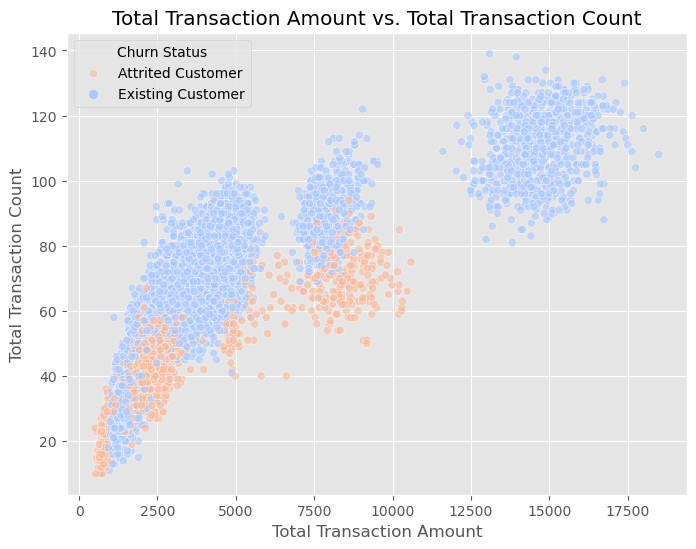

In [78]:
# Total Transaction Amount vs. Total Transaction Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_trans_amt', y='total_trans_ct', hue='churn_target', palette='coolwarm', alpha=0.6)

plt.title('Total Transaction Amount vs. Total Transaction Count')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')

plt.legend(title='Churn Status', labels=['Attrited Customer', 'Existing Customer'], loc='upper left')
plt.show()

According to the visualization, existing customers tend to spend more as well as have more transactions than attrited clients. Interestingly, at about 12,500 dollars, there don't seem to actually be any attrited clients beyond that figure. The bank should consider transaction volume as well as transaction amount when identifying client churn and how to better strategize marketing their services to lower spenders.  

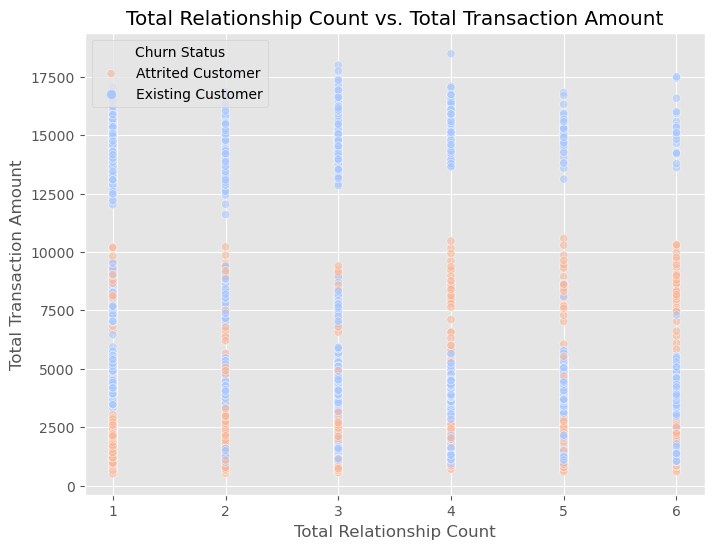

In [79]:
# Total Relationship Count vs. Total Transaction Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_relationship_count', y='total_trans_amt', hue='churn_target', palette='coolwarm', alpha=0.6)
plt.title('Total Relationship Count vs. Total Transaction Amount')
plt.xlabel('Total Relationship Count')
plt.ylabel('Total Transaction Amount')

plt.legend(title='Churn Status', labels=['Attrited Customer', 'Existing Customer'], loc='upper left')
plt.show()

According to the graph above and the correlation matrix (-0.150005), those with a greater number of products held from the bank tend to be existing customers, but attrited customers can also have similar relationship counts. The key distinguishing factor here is the total transaction amount. Regardless of relationship count, existing customers tend to spend more credit with the bank than attrited customers. At lower transaction levels and in the medium transaction area, the lines are a little more blurred. 

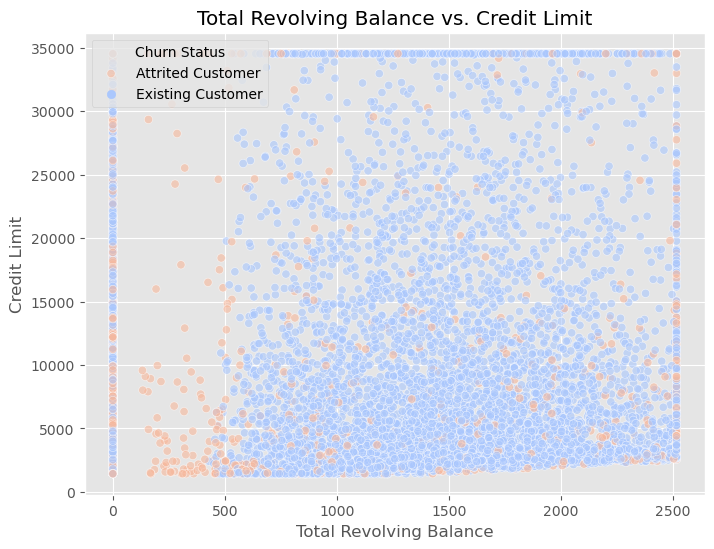

In [80]:
# Total Revolving Balance vs. Credit Limit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_revolving_bal', y='credit_limit', hue='churn_target', palette='coolwarm', alpha=0.6)
plt.title('Total Revolving Balance vs. Credit Limit')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Credit Limit')

plt.legend(title='Churn Status', labels=['Attrited Customer', 'Existing Customer'], loc='upper left')
plt.show()

Yet another instance of attrited customers having a lower total revolving balance than existing customers. 

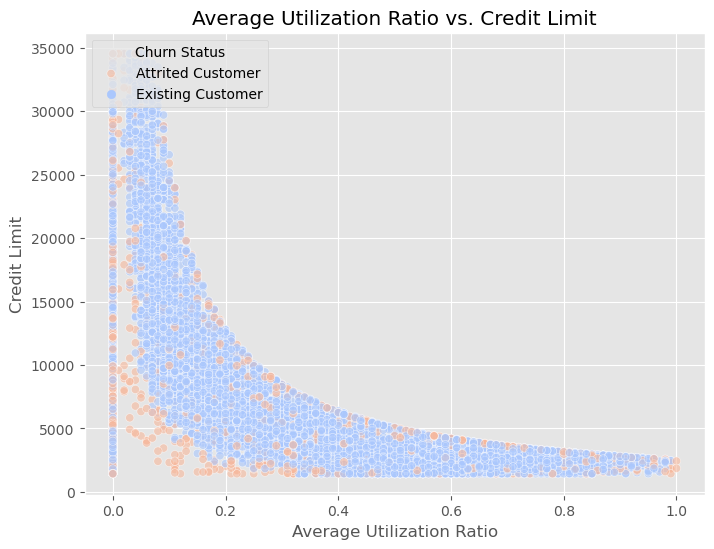

In [81]:
# Average Utilization Ratio vs. Credit Limit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_utilization_ratio', y='credit_limit', hue='churn_target', palette='coolwarm', alpha=0.6)
plt.title('Average Utilization Ratio vs. Credit Limit')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Credit Limit')

plt.legend(title='Churn Status', labels=['Attrited Customer', 'Existing Customer'], loc='upper left')
plt.show()

As expected, attrited customers' utilization ratios appear to be lower than existing customers, even adjusting for credit limit. There seems to be a general shift to the left for attrited customers, though at lower credit limits attrited customers are still maxing out their cards. 

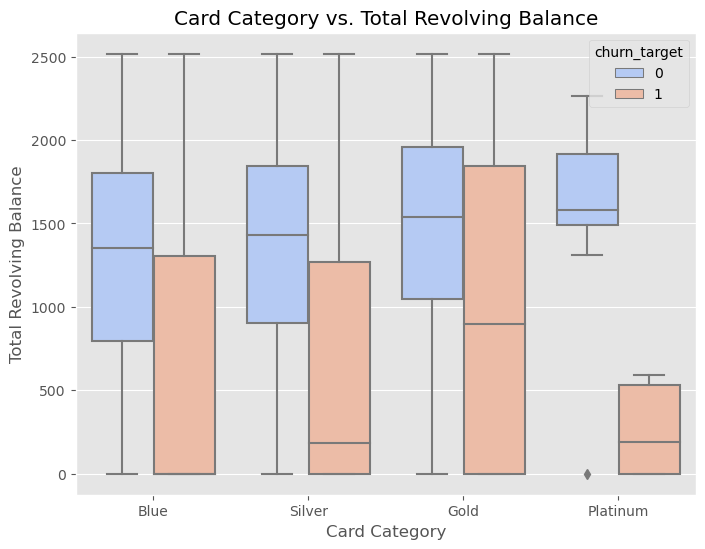

In [82]:
# Card Category vs. Total Revolving Balance boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='card_category', y='total_revolving_bal', hue='churn_target', palette='coolwarm')
plt.title('Card Category vs. Total Revolving Balance')
plt.xlabel('Card Category')
plt.ylabel('Total Revolving Balance')
plt.show()

There doesn't appear to be a noticeable trend here with regard to card categories and total revolving balances, unless strictly looking at existing customers. However, attrited customers with platinum cards, for whatever reason, seem to have lower total revolving balances. Perhaps this is because platinum cardholders are more financially sophisticated or more risk-averse, and they find the card's perks unsatisfactory. Clearly the existing customers do not share that sentiment since even the lowest spenders of the platinum category spend a lot more compared to existing customers at a lower card tier.  

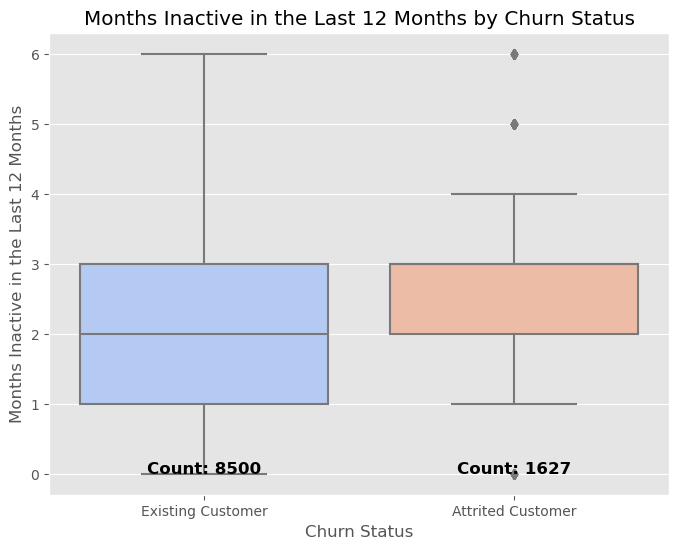

In [83]:
# months_inactive_12_mon by churn status boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x='churn_target', y='months_inactive_12_mon', palette='coolwarm')

# creating counts
count_existing = df[df['churn_target'] == 0].shape[0]
count_attrited = df[df['churn_target'] == 1].shape[0]

# adding the counts
ax.text(0, df['months_inactive_12_mon'].min(), f'Count: {count_existing}', horizontalalignment='center', size=12, color='black', weight='semibold')
ax.text(1, df['months_inactive_12_mon'].min(), f'Count: {count_attrited}', horizontalalignment='center', size=12, color='black', weight='semibold')

plt.title('Months Inactive in the Last 12 Months by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Months Inactive in the Last 12 Months')
plt.xticks([0, 1], ['Existing Customer', 'Attrited Customer'])

plt.show()

Interesting observation here. Months inactive is positively associated with attrited customers according to our correlation matrix and that fact is observed here. However, there is a wider range for existign customers regarding their months inactive. There seems to be more consistency for attrited customers (narrower spread), whereas existing customers' period of inactivity could be inactive for 1 month or as many as 6. So, existing customers may stay with the bank even in spite of greater periods of inactivity. 

One thing is certain: both attrited customers and existing customers can experience periods of inactivity, but only one group ultimately churns. Distinguishing between these two groups requires a deeper understanding of patterns and context regarding their inactivity.

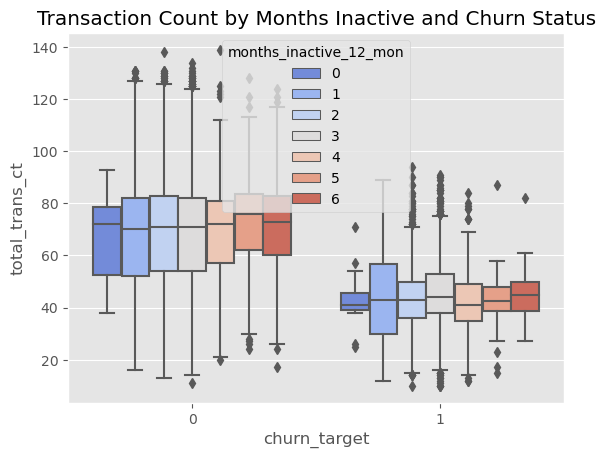

In [84]:
sns.boxplot(data=df, x='churn_target', y='total_trans_ct', hue='months_inactive_12_mon', palette='coolwarm')
plt.title('Transaction Count by Months Inactive and Churn Status')
plt.show()

We visually confirm that despite periods of inacticity for the existing customers, they tend to have many more transactions than their churning counterparts. This suggests that transaction activity is a strong indicator of engagement and retention.

Executives at the bank might consider incorporating a client’s total transactions, along with other variables such as total transaction amount and utilization ratio, when assessing churn risk. This approach can make targeted retention strategies much more accurate.

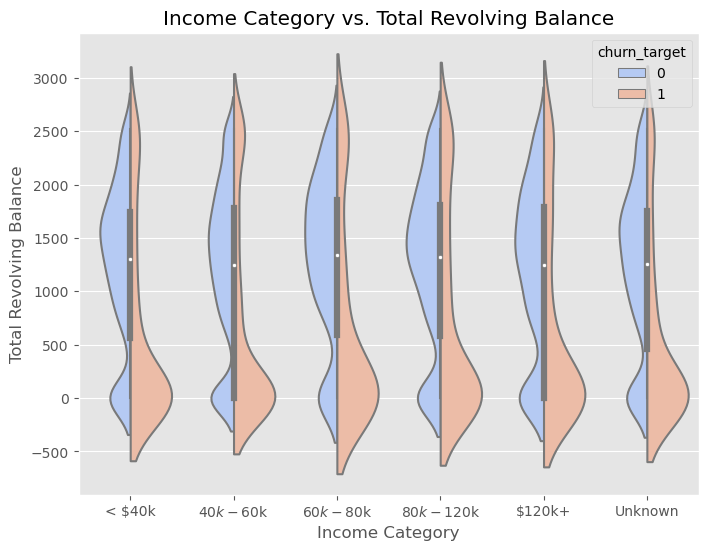

In [85]:
# income Category vs. Total Revolving Balance violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='income_category', y='total_revolving_bal', hue='churn_target', palette='coolwarm', split=True)
plt.title('Income Category vs. Total Revolving Balance')
plt.xlabel('Income Category')
plt.ylabel('Total Revolving Balance')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['< $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k+', 'Unknown'])
plt.show()

It seems that regardless of income level, attrited clients aren't too different from the existing clients even in the negatives. However, just like we've seen in the other graphs, they do seem to have a lower total revolving balance. 

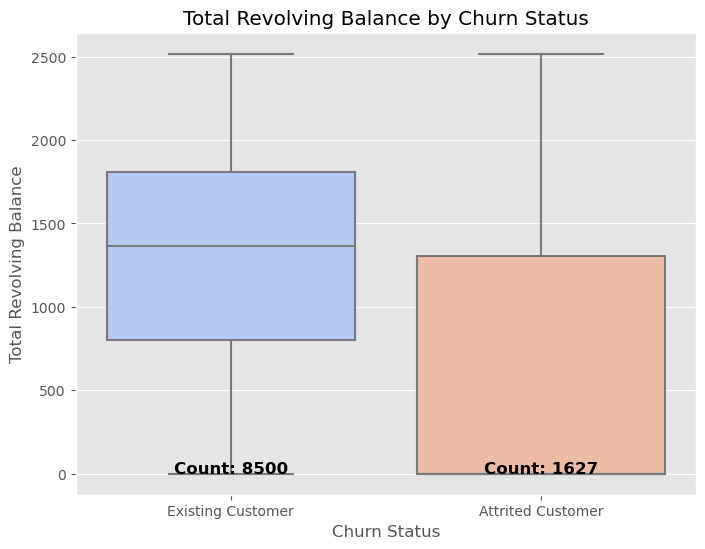

In [86]:
# distribution of total_revolving_bal for both churned and non-churned customers
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x='churn_target', y='total_revolving_bal', palette='coolwarm')

count_existing = df[df['churn_target'] == 0].shape[0]
count_attrited = df[df['churn_target'] == 1].shape[0]

ax.text(0, df['total_revolving_bal'].min(), f'Count: {count_existing}', horizontalalignment='center', size=12, color='black', weight='semibold')
ax.text(1, df['total_revolving_bal'].min(), f'Count: {count_attrited}', horizontalalignment='center', size=12, color='black', weight='semibold')

plt.title('Total Revolving Balance by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Revolving Balance')
plt.xticks([0, 1], ['Existing Customer', 'Attrited Customer'])

plt.show()

Finally taking a look at total revolving balance on its own, we confirm that existing customers have a higher revolving balance than their attrited counterparts. This goes hand in hand with total transactions and transaction amounts, both of which we have acknowledged are associated with the client choosing to stay with the bank.  

In [87]:
df.head(100)


,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_numeric,income_category_numeric,card_category_numeric,education_level_numeric,marital_status_numeric,churn_target
0,719859033,Attrited Customer,32,Male,3,Graduate,Married,$40k - $60k,Blue,20,...,6439.0,63.0,0.75,0.00,0,1,0,1,1,1
1,708399858,Existing Customer,45,Female,3,High School,Married,Less Than $40k,Blue,35,...,4747.0,77.0,0.79,0.88,1,0,0,0,1,0
2,708229308,Attrited Customer,49,Female,2,Unknown,Married,Less Than $40k,Blue,41,...,6059.0,71.0,0.82,0.00,1,0,0,-1,1,1
3,721398858,Existing Customer,43,Male,2,Unknown,Single,$120k +,Blue,34,...,4160.0,76.0,0.90,0.00,0,4,0,-1,0,0
4,710528583,Existing Customer,26,Female,0,Unknown,Single,$40k - $60k,Blue,16,...,2148.0,40.0,0.38,0.52,1,1,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,708330858,Attrited Customer,57,Male,3,Graduate,Married,$120k +,Blue,38,...,678.0,11.0,0.83,0.17,0,4,0,1,1,1
96,712701333,Existing Customer,53,Male,3,High School,Married,$60k - $80k,Blue,43,...,1219.0,27.0,0.50,0.41,0,2,0,0,1,0
97,715812258,Existing Customer,45,Male,2,High School,Married,$80k - $120k,Blue,34,...,1165.0,33.0,0.83,0.12,0,3,0,0,1,0
98,778286433,Existing Customer,67,Male,0,Graduate,Married,$40k - $60k,Blue,56,...,2133.0,55.0,0.72,0.22,0,1,0,1,1,0


We can see that our categorical columns have now been mapped to a numerical value. For our purposes, we don't need these columns anymore, as they are redundant and ultimately hard to interpret when we perform regression analysis. We will probably end up removing those columns now and instead adding in one-hot encoding to allow easier intepretation of those categorical variables. 

In [88]:
# drop numeric columns and churn_target
df = df.drop(columns=[
    'gender_numeric', 
    'income_category_numeric', 
    'card_category_numeric', 
    'education_level_numeric', 
    'marital_status_numeric',
    'churn_target'
])

## III. Predictive Analysis

In [89]:
# columns
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [90]:
# Ensure categorical columns have a proper order with the desired reference categories
df['marital_status'] = pd.Categorical(df['marital_status'], 
                                      categories=['Unknown', 'Single', 'Married', 'Divorced'], 
                                      ordered=True)

df['education_level'] = pd.Categorical(df['education_level'], 
                                       categories=['Unknown', 'High School', 'Graduate', 'College', 
                                                   'Doctorate', 'Post-Graduate', 'Uneducated'], 
                                       ordered=True)

df['income_category'] = pd.Categorical(df['income_category'], 
                                       categories=['Unknown', 'Less Than $40k', '$40k - $60k', 
                                                   '$60k - $80k', '$80k - $120k', '$120k +'], 
                                       ordered=True)

df['card_category'] = pd.Categorical(df['card_category'], 
                                     categories=['Blue', 'Silver', 'Gold', 'Platinum'], 
                                     ordered=True)

df['gender'] = pd.Categorical(df['gender'], 
                              categories=['Female', 'Male'], 
                              ordered=True)

# Perform one-hot encoding with the correct reference groups
df_predictive = pd.get_dummies(df, columns=[
    'marital_status', 
    'education_level', 
    'income_category', 
    'card_category', 
    'gender'
], drop_first=True)

# Display the updated column names to ensure the encoding is correct
print(df_predictive.columns)

Index(['clientnum', 'attrition_flag', 'customer_age', 'dependent_count',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'marital_status_Single', 'marital_status_Married',
       'marital_status_Divorced', 'education_level_High School',
       'education_level_Graduate', 'education_level_College',
       'education_level_Doctorate', 'education_level_Post-Graduate',
       'education_level_Uneducated', 'income_category_Less Than $40k',
       'income_category_$40k - $60k', 'income_category_$60k - $80k',
       'income_category_$80k - $120k', 'income_category_$120k +',
       'card_category_Silver', 'card_category_Gold', 'card_category_Platinum',
       'gender_Male'],
      dtype='object')


In [91]:
# list of column names 
column_names = df_predictive.columns
print(column_names)

Index(['clientnum', 'attrition_flag', 'customer_age', 'dependent_count',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'marital_status_Single', 'marital_status_Married',
       'marital_status_Divorced', 'education_level_High School',
       'education_level_Graduate', 'education_level_College',
       'education_level_Doctorate', 'education_level_Post-Graduate',
       'education_level_Uneducated', 'income_category_Less Than $40k',
       'income_category_$40k - $60k', 'income_category_$60k - $80k',
       'income_category_$80k - $120k', 'income_category_$120k +',
       'card_category_Silver', 'card_category_Gold', 'card_category_Platinum',
       'gender_Male'],
      dtype='object')


For the reference groups, we see that the following were dropped and became the dummy variables for their respective categorical covariate:

1. Gender: Female
2. Income Level: Unknown
3. Card Category: Blue
4. Marital Status: Unknown
5. Education Level: Unknown

We are using "Unknown" categories as the reference group for several of these variables. This allows us to treat the "Unknown" category as the baseline and compare the other categories against it. For example, if some customers have missing or unknown education levels, making "Unknown" the reference group can show how important education is in predicting churn compared to those without this information.

In [92]:
df_predictive['churn_target'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# Check the result
df_predictive.head()

,clientnum,attrition_flag,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,...,income_category_Less Than $40k,income_category_$40k - $60k,income_category_$60k - $80k,income_category_$80k - $120k,income_category_$120k +,card_category_Silver,card_category_Gold,card_category_Platinum,gender_Male,churn_target
0,719859033,Attrited Customer,32,3,20,2,2,2,3264.0,0.0,...,0,1,0,0,0,0,0,0,1,1
1,708399858,Existing Customer,45,3,35,2,2,1,2548.0,2250.0,...,1,0,0,0,0,0,0,0,0,0
2,708229308,Attrited Customer,49,2,41,5,2,2,3243.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,721398858,Existing Customer,43,2,34,5,3,4,33913.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,710528583,Existing Customer,26,0,16,6,2,4,1612.0,835.0,...,0,1,0,0,0,0,0,0,0,0


In [93]:
df_predictive.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'dependent_count',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'marital_status_Single', 'marital_status_Married',
       'marital_status_Divorced', 'education_level_High School',
       'education_level_Graduate', 'education_level_College',
       'education_level_Doctorate', 'education_level_Post-Graduate',
       'education_level_Uneducated', 'income_category_Less Than $40k',
       'income_category_$40k - $60k', 'income_category_$60k - $80k',
       'income_category_$80k - $120k', 'income_category_$120k +',
       'card_category_Silver', 'card_category_Gold', 'card_category_Platinum',
       'gender_Male', 'churn_target'],
      dtype='object')

In [94]:
# rename columns with spaces or special characters as well as multiple underscores
df_predictive.columns = df_predictive.columns.str.replace(' ', '_') \
    .str.replace('$', '') \
    .str.replace('-', '_')

df_predictive.columns = df_predictive.columns.str.replace('__', '_')

# Rename the column to avoid special characters
df_predictive.columns = df_predictive.columns.str.replace('+', '_plus')

print(df_predictive.columns)

Index(['clientnum', 'attrition_flag', 'customer_age', 'dependent_count',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'marital_status_Single', 'marital_status_Married',
       'marital_status_Divorced', 'education_level_High_School',
       'education_level_Graduate', 'education_level_College',
       'education_level_Doctorate', 'education_level_Post_Graduate',
       'education_level_Uneducated', 'income_category_Less_Than_40k',
       'income_category_40k__60k', 'income_category_60k__80k',
       'income_category_80k__120k', 'income_category_120k__plus',
       'card_category_Silver', 'card_category_Gold', 'card_category_Platinum',
       'gender_Male', 'churn_target'],
      dtype='object')


Spacing issues will become a problem when trying to run the regression so we address that now.

To avoid multicollinearity issues, we're going to look back at our heatmap to find the relevant covariates to use in our logistic regression model as well as avoid using variables correlated with each other. 

### Logistic Regression

In [95]:
# including all columns and categorical variables
formula1 = """
churn_target ~ contacts_count_12_mon + months_inactive_12_mon + total_revolving_bal + months_on_book + credit_limit + 
card_category_Gold + card_category_Platinum + card_category_Silver + total_trans_ct + gender_Male +
education_level_College + education_level_Doctorate + education_level_Post_Graduate + education_level_Uneducated + 
marital_status_Married + marital_status_Divorced + dependent_count + marital_status_Single +
income_category_40k__60k + income_category_60k__80k + income_category_80k__120k + income_category_120k__plus +
total_ct_chng_q4_q1 + avg_utilization_ratio + customer_age + total_trans_amt
"""
# Fit the logistic regression model
model1 = smf.logit(formula=formula1, data=df_predictive).fit(maxiter=200)
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.247533
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           churn_target   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10100
Method:                           MLE   Df Model:                           26
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.4384
Time:                        16:41:12   Log-Likelihood:                -2506.8
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.8435      0.339     11.327      0.

Interpreting these coefficients is a bit more involved than interpreting the coefficients of, say, an OLS regression output. Since we are working with logistic regression, emphasis is put on the *log-odds* of an event occurring now since we are predicting a binary outcome and not a continuous one (OLS). Essentially, the log-odds are the natural logarithm of the odds of an event happening: Odds = P(event) / (1 - P(event)). Taking the log of this equation is known as the **logit** function. 

So, for example, the log odds of churn when all covariates are held constant (zero) is 3.8435 (the intercept). Though, this isn't really a useful interpretation since a client of the bank has to have an income, an age, and so on. 

To convert log odds to a probability, we require the following formula: $$\displaystyle p(\text{Churn} = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}$$

And conversely, we subtract that formula from 1 to observe the probability of no churn.

Taking the intercept as our previous example, we write: 
$$
p(\text{Churn} = 1) = \frac{1}{1 + e^{-3.8435}} \approx 0.980
$$


Thus, when all features are held constant, the probability of churn is approximately 98%. As mentioned earlier, however, this result's interpretation isn't very useful, but will gradually become more useful as we begin to incorporate the other significant covariates. 

Speaking of other covariates, we can interpret ones like months_inactive_12_mon, which represents the number of inactive months the bank client has had over the last 12 months. This value, 0.5079, represents the change in log-odds of churn for a one-unit increase in the months_inactive_12_mon feature while keeping all other variables constant. So, with this being a postiive coefficient, it indicates that greater months of inactivity are associated with a higher **likelihood** of churn. 

However, there's a more useful way to interpret this coefficient, and that is by calculating the odds ratio. The odds ratio tells us how the odds of the event (in this case, churn) change for a one-unit increase in the feature, while keeping all other features constant. We can take the log-odds (the coefficient as we established earlier) and exponentiate that figure to get the odds ratio.  

Thus, we arrive at the simple formula for the odds ratio: Odds Ratio = $e^{(\beta_i)}$ where i is any particular feature $Xi$.

So, taking months_inactive_12_mon for example, we write: $e^{(0.5079)} \approx 1.662$. To interpret this, we say that for each additional month of inactivity, the odds of churn increase by a factor of 1.662, holding all other variables constant. This means that if a customer has been inactive for one more month, their odds of churning are 1.662 times greater compared to a customer who has been inactive for one less month, assuming that all other factors (e.g., income, card type, etc.) remain the same. Thus, inactivity can be a strong predictor of churn. The more months a customer remains inactive, the higher the likelihood they will leave the bank's services. This same principle applies to our contacts_count_12_mon covariate (0.4786). This suggests that inactivity and frequent contacts with the bank (possibly representing client dissatisfaction and seeking out assistance) are associated with a higher likelihood of churning. 

Note:It's important to emphasis likelihood and not probability in this case, as we are calculating odds and not probability. 

As for covariate significance, we see that months_on_book, card_category_Platinum, several education levels, marital_status_Divorced, income_category_40k_60k, income_category_60k_80k, avg_utilization_ratio, and customer_age are all *insignificant* at the 5% level of significance. In other words, there is insufficient statistical evidence to suggest that the churn is associated with these covariates. If we conducted a hypothesis test to determine if card_category_Platinum has a significant effect on churn, we would fail to reject the null hypothesis ($ H_0: \beta_7 = 0 $) and conclude that card_category_Platinum does not have a significant effect on churn in this model due to the p-value (0.058) being greater than the 0.05 significance level.

As we continue, we remember that our visualizations from earlier that covariates like total_transaction_amt and total_revolving_bal were decent indicators of a bank client churning or not. Looking at the output of the logistic regression above, we see that total_revolving_bal has a coefficient of -0.0009, which when exponentiated, equals approximately 0.9991. Therefore, with an odds ratio of 0.9991, since it is less than 1, we conclude that each additional dollar in the revolving balance decreases the odds of churn by a factor of 0.9991. In other words, as the revolving balance increases, the likelihood of churn decreases (i.e., customers with higher balances are slightly less likely to churn). It’s important to note that coefficients in logistic regression should not be interpreted the same way as those in OLS regression. The coefficient of -0.0009 might seem insignificant on its own, but when we apply the odds ratio formula, it provides much-needed context. The odds ratio helps us understand the practical significance of the feature in terms of the odds of churn, not just its log-odds.

Now let's take a look at a categorical variable. Using marital status as an example and their respective coefficients in the output, we can calculate the odds ratios of 0.556, 0.892, and 1.053 for married, divorced, and single individuals respectively. We should remember that we are using unknown marital status as the reference group. So, the odds of churn for single individuals are 5.3% (1.053 times as likely) higher than the odds of churn for individuals with an unknown marital status. 

Therefore, we interpret categorical covariates' odds ratios very similarly to those of quantitative covariates in a logistic regression. However, there is a small but important distinction to make: we assess how the odds of the event (in this case, churn) change for each category relative to a reference group. For quantitative covariates, we interpret the odds ratio based on a one-unit increase in the predictive variable. For categorical covariates, the odds ratio is interpreted as the change in odds relative to the reference group (the dummy group) rather than a one-unit change.

Let's end this logistic regression analysis by looking at an important feature: total transactions. Looking at the coefficient on total_trans_ct (-0.1182), we exponentiate that coefficient to get an odds ratio of 0.888. An odds ratio of 0.888 means that for each one-unit increase in total_trans_ct (total transactions), the odds of churn decrease by a factor of 0.888. Alternatively, this means each additional transaction decreases the odds of churn by approximately 11.2%. The higher the number of transactions, the less likely the customer is to churn, and this statement is supported by previous visualizations that connected the vast majority of existing customers with higher purchasing amounts and transactions. 

### Machine Learning and Forecasting

We've already extracted some insights from the analysis above, but we can take those insights a step further with classification and ensemble techniques. Reduction techniques (e.g., LDA) can also be used for further clarity.

In [96]:
!pip install xgboost

In [97]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

We will use gradient boosting here as our primary ensemble technique (since it will likely work better with our tabular dataset and is generally more appropriate for larger datasets), but we will also use bagging (random foresting) to determine which is more accurate and better for our data. 

To avoid overfitting (performing well on training data but poorly on new data), we will recall some of our most important covariates as well as remove the statistically insignificant ones. Overfitting can also be reduced with the use of **cross-validation**, which is a technique used to assess the generalization ability of a machine learning model, meaning how well it performs on unseen data. It helps to understand if a model is overfitting or underfitting (failing to capture underlying patterns in the data). In our case, we will use 5-fold cross-validation, which means the dataset is split into 5 roughly equal-sized subsets/folds. After training and testing the model on each fold, the performance scores (below) are calculated for each fold.

Additionally, for accuracy we will be utilizing precision, recall, and f1-scores. These formulas are determined as follows:

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
$$

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
$$

**Precision** for churned clients measures how many of the clients the model predicted to churn actually did churn. In other words, it's about how accurate the model is when it predicts churn. A high precision means that when the model says a client is going to churn, it's likely to be correct.

**Recall** for churned clients measures how many of the actual churned clients the model correctly predicted as churned. It’s about how comprehensive the model is in identifying clients who will churn. A high recall means the model is correctly identifying most of the churned clients, but it might also include some **false positives** (clients who didn’t churn but were predicted to).

Precision answers: "When we predicted churn, how often was it correct?"

Recall answers: "Of all the churned clients, how many did we correctly predict as churn?"

Lastly, we have the **F1-score**. The F1-score is the harmonic mean of precision and recall. It balances both metrics (precision and recall) and gives a single value that combines them. A high F1-score means that both precision and recall are high, which is ideal when both false positives and false negatives are costly in a scenario like this where the bank does not wish to lose clients.

$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


With that out of the way, we will begin with classification.

In [98]:
features = [
    'contacts_count_12_mon', 'months_inactive_12_mon', 'total_revolving_bal', 'credit_limit',
    'card_category_Gold', 'card_category_Silver', 'total_trans_ct', 'gender_Male',
    'education_level_Doctorate', 'marital_status_Married', 'dependent_count',
    'income_category_80k__120k', 'income_category_120k__plus', 'total_ct_chng_q4_q1', 'total_trans_amt'
]
X = df_predictive[features]
y = df_predictive["churn_target"]

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# train XGBoost model
xgb_model = XGBClassifier(eval_metric="logloss", random_state=200)
xgb_model.fit(X_train, y_train)

# 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy') 

# cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

# predictions
y_pred = xgb_model.predict(X_test)

# performance
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.93682132 0.95014808 0.93728395 0.95753086 0.95506173]
Mean cross-validation accuracy: 0.9474
Standard deviation of cross-validation scores: 0.0088
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1716
           1       0.84      0.83      0.84       310

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Accuracy: 0.9501480750246791


It looks like our model performed quite accurately at predicting the customers who did not churn, but could use some improvement at predicting those who did churn. 

- 97% of the customers predicted to not churn were correctly identified as non-churned. 97% of the **actual** non-churned customers were correctly predicted as non-churned.
- 84% of the customers predicted to churn were correctly identified as churned. 83% of the **actual** churned customers were correctly predicted as churned.
- The model achieved 95.01% overall accuracy, but 91% macro average precision suggests that while it performs well for non-churned customers (0), there is a slightly lower ability to correctly identify churned customers (1), which indicates potential room for improvement in predicting the minority class (churn).

We can also try if bagging results in a more accurate model.

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
features = [
    'contacts_count_12_mon', 'months_inactive_12_mon', 'total_revolving_bal', 'credit_limit',
    'card_category_Gold', 'card_category_Silver', 'total_trans_ct', 'gender_Male',
    'education_level_Doctorate', 'marital_status_Married', 'dependent_count',
    'income_category_80k__120k', 'income_category_120k__plus', 'total_ct_chng_q4_q1', 'total_trans_amt'
]
X = df_predictive[features]
y = df_predictive["churn_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=200)
rf_model.fit(X_train, y_train)

# 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy') 

# cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

# predictions
y_pred_rf = rf_model.predict(X_test)

# performance
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Cross-validation scores: [0.93139191 0.95459033 0.92888889 0.95259259 0.94962963]
Mean cross-validation accuracy: 0.9434
Standard deviation of cross-validation scores: 0.0110
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1716
           1       0.87      0.78      0.83       310

    accuracy                           0.95      2026
   macro avg       0.92      0.88      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Accuracy: 0.9491609081934848


- 96% of the customers predicted to not churn were correctly identified as non-churned. 98% of the **actual** non-churned customers were correctly predicted as non-churned.
- 98% of the actual non-churned customers were correctly predicted as non-churned. 78% of the **actual** churned customers were correctly predicted as churned, which is lower than the recall for non-churned customers.
- The model achieved ~95% overall accuracy, which is comparable to our XGboost model. Though, the Random Forest does have a slightly higher macro average precision score of 92% than the XGboost model.

It seems like both of the models performed quite well, which is a good sign as far as our predictive features go. XGBoost has a slightly higher accuracy and better performance in predicting churned clients (higher recall), making it better for capturing churn (the minority class). Random Forest has better recall for non-churned customers. However, its lower recall for churned customers makes it less effective at identifying churn risk. That said, both models are quite comparable, and it may come down to interpretability and what one might find easier to work with. Both models concluded with a 95% weighted F1-score. Personally, I would say that the XGBoost model has a small edge over the Random Forest model. 

Feature analysis will also be different for both models, so let's take a look at that. 

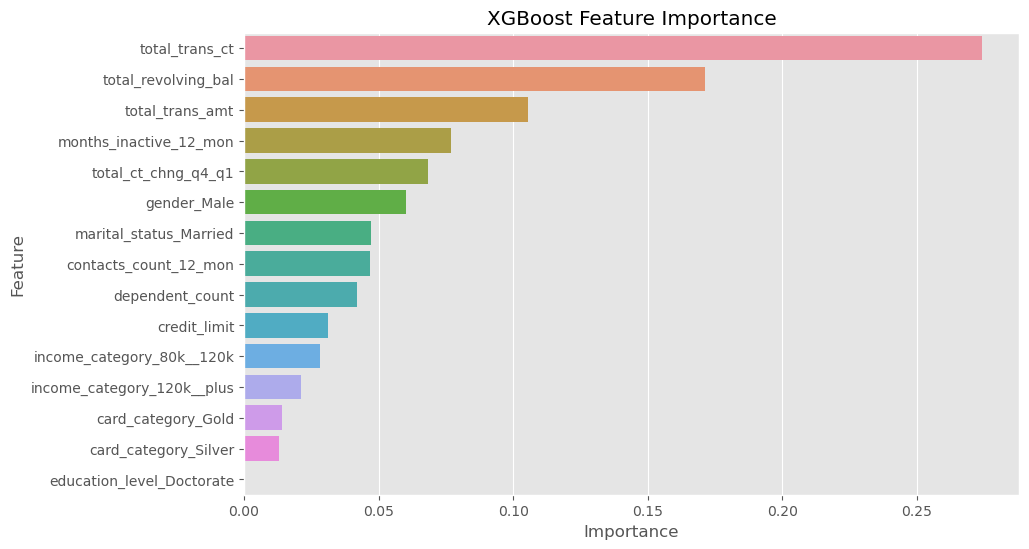

In [101]:
# feature importance from XGBoost model
xgb_importance = xgb_model.feature_importances_

# new df to visualize the feature importance
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importance
})

# sorting the df by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("XGBoost Feature Importance")
plt.show()

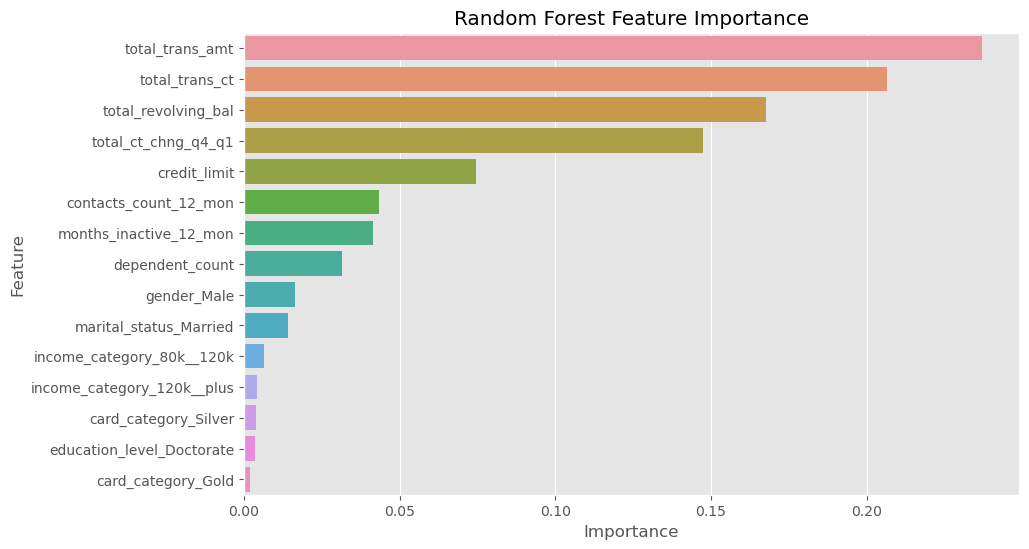

In [102]:
# feature importance from RF model
rf_importance = rf_model.feature_importances_

# new df to visualize the feature importance
importance_rf_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importance
})

# sorting the df by importance
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)

# plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_rf_df)
plt.title("Random Forest Feature Importance")
plt.show()

As expected, there are some small differences in what each model determines as the most important features. Gender and months inactive are have more importance in the XGBoost model, which also places a lot more emphasis on total transaction count. The random forest model views transaction amount, transaction count, total revolving balance, and total transaction change from q4 to q1 as all very important features, whereas XGBoost primarily looks at total transaction count. Though, this does make sense when you understand the key underpinnings of these different algorithms. Random Forest is more like an "average" of many independent trees, which may lead to a broader selection of important features across trees.
XGBoost focuses on correcting the mistakes of previous trees, so the importance is more focused on features that progressively help the model improve its predictive accuracy.

## IV. Conclusion

We could go even further with our analysis using K-means clustering or Lasso regularization, but we have a plethora of insights and visualizations here that have solidified our beliefs about the dataset. Our descriptive and predictive analyses largely yielded the same results, but having both at our disposal is able to give us statistically significant results as well as verify unfounded claims about the data based on belief alone. 

At the outset, the key questions in our project were:

1. **Who is at risk of churning?**
2. **What factors influence churn?**
3. **How do churn patterns vary across different demographics?**
4. **What steps can the bank take to reduce churn?**

Our descriptive and predictive analyses reveal several key insights that can help the bank better understand client behavior, identify high-risk churners, and develop more targeted retention strategies.

### 1. Churning Individuals
- **Low Transaction Volume & Spending:** Clients who engage in fewer transactions and spend less are at higher risk of churning. Our analysis showed that clients with fewer transactions and lower total transaction amounts were more likely to churn. Therefore, clients who exhibit low engagement (both in terms of transaction count and amount) are at higher risk. 

- **Lower Revolving Balances:** Clients with lower total revolving balances are also more likely to churn. Though there is a wide range with churning clients, with some as low as `$100` and others exceeding `$2500`, the majority of churners seem to display a lower revolving balance than their existing client counterparts. The bank should pay particular attention to customers with low revolving balances, as they might signal disengagement or dissatisfaction.

- **Inactive Customers:** Customers with longer periods of inactivity may be at risk, but periods of inactivity alone are not definitive. Existing customers do experience inactivity, but those who show low transaction counts during these inactive periods are more likely to churn.

### 2. Churn Factors
- **Customer loyalty/disloyalty:** As demonstrated by the negative correlation between total transaction count and churn, customers who make more transactions are less likely to churn. Similarly, those with higher total transaction amounts are more engaged and less likely to churn. These factors are strong indicators of customer loyalty.

- **Revolving Balance**: Customers with higher total revolving balances tend to stay with the bank, as existing customers typically have larger balances. A lower revolving balance correlates with churn, suggesting that customers who don't utilize the bank’s credit services may not find enough value to stay, which then leads to periods of inactivity.

- **Income Levels**: The majority of churned customers come from the lower-income bracket (less than `$40k`). While middle-income customers show relatively lower churn rates, customers in this group tend to be more engaged. Therefore, income levels do influence churn, but there is a greater opportunity to target lower-income customers with retention strategies.

- **Utilization Ratio**: Attrited customers tend to have lower utilization ratios compared to existing customers, even after adjusting for credit limits. This suggests that those who use the bank's credit services less are more likely to churn.

- **Months Inactive:** Customers with extended periods of inactivity are more likely to churn. However, existing customers also show periods of inactivity, suggesting that transaction volume and engagement (rather than just inactivity) are more significant indicators of retention.

### 3. Demographical Churn
- **Low-Income Customers:** The majority of churned customers belong to the lower-income bracket (less than `$40k`). This group exhibits the highest churn, but percentage wise doesn't vary too significantly from other income brackets.

- **Middle-Income Customers:** Middle-income customers (e.g., those with incomes between `$40k` and `$80k`) demonstrate lower churn rates. This group seems to be more stable and engaged compared to both lower-income and high-income groups.

- **Higher-Income Customers:** Customers with higher incomes (e.g., `$120k+`) tend to exhibit lower churn rates, but their behavior is more varied and less consistent, suggesting that higher-income customers are not as homogeneous as other income groups. This coincides with the behavior displayed by platinum card holders.

- **Blue Card Users:** A majority of customers are in the Blue card category, and their churn rates align with those observed in lower-income groups.

- **Platinum Card Users:** Surprisingly, Platinum cardholders who have churned tend to have lower total revolving balances, suggesting that they might be more financially sophisticated or risk-averse, and could find the bank's offerings less appealing. However, platinum cardholders also tend to spend more. Therefore, lower spending among platinum cardholders is a significant indication of potential churn, particularly if associated with lower transaction counts and amounts.

### 4. Recommendations

**Focus on Low-Transaction and Low-Spending Customers:**

- The bank should implement targeted retention strategies for customers with low transaction counts and low transaction amounts. Offering incentives, rewards, or exclusive services for clients who engage less could encourage them to increase their transaction activity and deepen their relationship with the bank.

- Clients showing long periods of inactivity should be identified early. The bank can send personalized offers, check-ins, or rewards to re-engage them. However, it's important to note that not all inactive customers will churn, so analyzing inactivity along with other engagement metrics (like transaction volume) is crucial.

**Target Lower-Income Customers:**

- Low-income customers exhibit higher churn rates, making them a priority for retention efforts. The bank could offer lower-fee services or customized products tailored to their needs, helping them feel more valued and engaged.

**Encourage Spending with Higher-Revolving Balances:**

- The bank should encourage higher spending by offering rewards or incentives to customers with lower revolving balances. The goal would be to increase the utilization ratio and ensure that these customers are actively using the bank's services. Though, this would need to be considered carefully with regard to income bracket and how many transactions the client has.

**Enhance Cardholder Experience:**

- The bank should consider revisiting the Platinum card's value proposition, offering additional perks or rewards that resonate with this more financially aware demographic to improve engagement and retention. Additionally, the Blue card is the overwhelming choice of card for the bank's clients. In its effort to create a more premium high-end experience, the bank should also make climbing its ladder of cards (Silver and Gold) more feasible for its clients due to how few its numbers are in these categories despite having clients of all income backgrounds.

**Predictive Analytics:**

- Implement predictive analytics that track customer behavior (e.g., transaction activity, spending patterns) to identify at-risk customers early. This can enable proactive retention strategies, such as offering tailored promotions or personalized outreach to reduce churn before it happens. With what we established in our predictive analysis using logistic regression and ensemble techniques, the bank should be proactively using existing data and models such as the ones above to prevent cases of churn.

By leveraging insights from our analysis, the bank can identify high-risk churn segments, particularly among low-income and low-transaction customers, and implement targeted retention strategies. Combining sharp business initiatives paired with the right machine learning models and statistical techniques, the bank will be able to stabilize its revenue, strengthen its clients' loyalty, and ultimately reduce churn. This data-driven approach not only empowers the bank to make more informed decisions but also positions it for sustained success and competitive advantage in the long term. 